# Exploring US College Students' trends in their economy based on their field of study

For this project, I have obtained the dataset from the US Department of Education (https://collegescorecard.ed.gov/data/), which contains college student data including subject, earnings, debts, payments etc.
For that reason, I decided to explore students' trend by subject and look through their incomes and expenses.

#### Data Dictionary

1. UNITID: Unit ID for institution
2. OPEID6: 6-digit OPE ID for institution
3. INSTNM: Institution name
4. CONTROL: Control of institution
5. MAIN: Flag for main campus
6. CIPCODE:Classification of Instructional Programs (CIP) code for the field of study
7. CIPDESC: Text description of the field of study CIP Code
8. CREDLEV: Level of credential
9. CREDDESC:Text description of the level of credential
10. COUNT: Number of borrowers of federal loans completing college
11. DEBTMEDIAN: Median federal loan debt of borrowers completing college
12. DEBTPAYMENT10YR: Median federal loan debt of borrowers completing college in monthly payments (10-year amortization plan)
13. DEBTMEAN: Mean federal loan debt of borrowers completing college
14. TITLEIVCOUNT: Number of federally-aided students completing college
15. EARNINGSCOUNT: Number of federally-aided students completing college in the earnings cohort
16. MD_EARN_WNE: Median earnings of federally-aided completers in the earnings cohort
17. IPEDSCOUNT1: Number of awards to all students in year 1 of the pooled debt cohort
18. IPEDSCOUNT2: Number of awards to all students in year 2 of the pooled debt cohort


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Most-Recent-Field-Data-Elements.csv")

In [3]:
df.shape

(216638, 18)

In [4]:
df.columns.to_list()

['UNITID',
 'OPEID6',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPCODE',
 'CIPDESC',
 'CREDLEV',
 'CREDDESC',
 'COUNT',
 'DEBTMEDIAN',
 'DEBTPAYMENT10YR',
 'DEBTMEAN',
 'TITLEIVCOUNT',
 'EARNINGSCOUNT',
 'MD_EARN_WNE',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2']

In [5]:
len(set(df.INSTNM.unique()))

7476

In [6]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


In [7]:
df['CREDDESC'].replace('Bachelors Degree', 'Bachelor\'s Degree', inplace = True)

In [8]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


# Data Cleansing & Feature creation

#### *Data Cleansing*

Remove all privacy suppressed data as well as check for missing values

In [9]:
df.isin(['PrivacySuppressed']).any()

UNITID             False
OPEID6             False
INSTNM             False
CONTROL            False
MAIN               False
CIPCODE            False
CIPDESC            False
CREDLEV            False
CREDDESC           False
COUNT               True
DEBTMEDIAN          True
DEBTPAYMENT10YR     True
DEBTMEAN            True
TITLEIVCOUNT        True
EARNINGSCOUNT       True
MD_EARN_WNE         True
IPEDSCOUNT1        False
IPEDSCOUNT2        False
dtype: bool

In [10]:
print('{} features have Privacy Suppressed entries'.format(sum(df.isin(['PrivacySuppressed']).any())))

7 features have Privacy Suppressed entries


In [11]:
df.columns[9:16]

Index(['COUNT', 'DEBTMEDIAN', 'DEBTPAYMENT10YR', 'DEBTMEAN', 'TITLEIVCOUNT',
       'EARNINGSCOUNT', 'MD_EARN_WNE'],
      dtype='object')

In [12]:
df.loc[df['COUNT']=='PrivacySuppressed']

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
5,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,6,Doctoral Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216633,NaN,42817,Compton College,Public,1,5109,"Allied Health Diagnostic, Intervention, and Tr...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216634,NaN,42817,Compton College,Public,1,5111,Health/Medical Preparatory Programs.,2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216635,NaN,42817,Compton College,Public,1,5138,"Registered Nursing, Nursing Administration, Nu...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
216636,NaN,42817,Compton College,Public,1,5202,"Business Administration, Management and Operat...",2,Associate's Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN


In [13]:
for cols in df.columns[9:16]:
    df.drop(df[df[cols]=='PrivacySuppressed'].index,  inplace = True)
    
print('{} features have Privacy Suppressed entries'.format(sum(df.isin(['PrivacySuppressed']).any())))
print('The new dataframe dimensions are {} by {}'.format(df.shape[0], df.shape[1]))

0 features have Privacy Suppressed entries
The new dataframe dimensions are 36720 by 18


In [14]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelor's Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelor's Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor's Degree,22,34809,361,36482,33,31,54500,19.0,11.0
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,39,29956,311,30970,30,30,24000,28.0,28.0
38,100654.0,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelor's Degree,59,34000,353,32783,31,30,23800,30.0,43.0


In [15]:
# Change unit id from float to integer
df.UNITID = df.UNITID.astype(np.int64)

In [16]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelor's Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelor's Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor's Degree,22,34809,361,36482,33,31,54500,19.0,11.0
37,100654,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,39,29956,311,30970,30,30,24000,28.0,28.0
38,100654,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelor's Degree,59,34000,353,32783,31,30,23800,30.0,43.0


Find and drop missing values

In [17]:
df.isnull().any()

UNITID             False
OPEID6             False
INSTNM             False
CONTROL            False
MAIN               False
CIPCODE            False
CIPDESC            False
CREDLEV            False
CREDDESC           False
COUNT              False
DEBTMEDIAN         False
DEBTPAYMENT10YR    False
DEBTMEAN           False
TITLEIVCOUNT       False
EARNINGSCOUNT      False
MD_EARN_WNE        False
IPEDSCOUNT1         True
IPEDSCOUNT2         True
dtype: bool

In [18]:
df.dropna(inplace = True)

df.isnull().any()

UNITID             False
OPEID6             False
INSTNM             False
CONTROL            False
MAIN               False
CIPCODE            False
CIPDESC            False
CREDLEV            False
CREDDESC           False
COUNT              False
DEBTMEDIAN         False
DEBTPAYMENT10YR    False
DEBTMEAN           False
TITLEIVCOUNT       False
EARNINGSCOUNT      False
MD_EARN_WNE        False
IPEDSCOUNT1        False
IPEDSCOUNT2        False
dtype: bool

In [19]:
df.shape

(35550, 18)

In [20]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelor's Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelor's Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelor's Degree,22,34809,361,36482,33,31,54500,19.0,11.0
37,100654,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,39,29956,311,30970,30,30,24000,28.0,28.0
38,100654,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelor's Degree,59,34000,353,32783,31,30,23800,30.0,43.0


In [21]:
df.dtypes


UNITID               int64
OPEID6               int64
INSTNM              object
CONTROL             object
MAIN                 int64
CIPCODE              int64
CIPDESC             object
CREDLEV              int64
CREDDESC            object
COUNT               object
DEBTMEDIAN          object
DEBTPAYMENT10YR     object
DEBTMEAN            object
TITLEIVCOUNT        object
EARNINGSCOUNT       object
MD_EARN_WNE         object
IPEDSCOUNT1        float64
IPEDSCOUNT2        float64
dtype: object

In [22]:
for cols in df.columns[9:]:
    df[cols] = df[cols].astype(np.int64)

In [23]:
df.dtypes

UNITID              int64
OPEID6              int64
INSTNM             object
CONTROL            object
MAIN                int64
CIPCODE             int64
CIPDESC            object
CREDLEV             int64
CREDDESC           object
COUNT               int64
DEBTMEDIAN          int64
DEBTPAYMENT10YR     int64
DEBTMEAN            int64
TITLEIVCOUNT        int64
EARNINGSCOUNT       int64
MD_EARN_WNE         int64
IPEDSCOUNT1         int64
IPEDSCOUNT2         int64
dtype: object

In [24]:
# Check for duplicates 

sum(df.duplicated())
# No need to drop since no duplicates have been detected


0

# Select features



Dropping 4 columns:
1. INSTNM
2. MAIN
3. CIPDESC
4. CREDDESC

2 columns will be the identity columns:
1. UNITID
2. OPEID6



In [25]:
df.drop(["INSTNM","MAIN", "CIPDESC", "CREDDESC"], axis = 1, inplace = True)

In [26]:
df.shape

(35550, 14)

In [27]:
## Transform the Control variable to Numeric 

df.CONTROL = df.CONTROL.astype('category').cat.codes



In [28]:
df.reset_index(drop=True, inplace = True)

In [29]:
df.head()

,UNITID,OPEID6,CONTROL,CIPCODE,CREDLEV,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654,1002,2,1101,3,25,36250,376,37194,33,33,54300,17,16
1,100654,1002,2,1313,3,46,31505,327,33085,32,31,25400,24,33
2,100654,1002,2,1410,3,22,34809,361,36482,33,31,54500,19,11
3,100654,1002,2,2401,3,39,29956,311,30970,30,30,24000,28,28
4,100654,1002,2,2601,3,59,34000,353,32783,31,30,23800,30,43


In [30]:
df.dtypes

UNITID             int64
OPEID6             int64
CONTROL             int8
CIPCODE            int64
CREDLEV            int64
COUNT              int64
DEBTMEDIAN         int64
DEBTPAYMENT10YR    int64
DEBTMEAN           int64
TITLEIVCOUNT       int64
EARNINGSCOUNT      int64
MD_EARN_WNE        int64
IPEDSCOUNT1        int64
IPEDSCOUNT2        int64
dtype: object

In [31]:
df.describe()

,UNITID,OPEID6,CONTROL,CIPCODE,CREDLEV,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
count,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000,35550.000000
mean,229641.008748,7401.040141,1.316568,3628.809086,3.083854,188.301575,27370.473699,297.512068,27712.094627,163.151027,153.181969,40255.026723,87.826610,87.690183
std,111485.669416,9515.171525,0.800457,1702.749958,1.318406,548.845121,23090.613467,272.184688,22481.166267,506.103551,474.460957,18804.358145,170.498763,174.939054
min,100654.000000,1002.000000,0.000000,100.000000,1.000000,20.000000,1750.000000,18.000000,1860.000000,20.000000,20.000000,2700.000000,0.000000,0.000000
25%,156107.000000,2150.000000,1.000000,1506.000000,2.000000,41.000000,17401.500000,182.000000,18130.250000,34.000000,32.000000,27200.000000,27.000000,26.000000
50%,197133.000000,3302.000000,2.000000,4407.000000,3.000000,71.000000,23500.000000,245.000000,23042.000000,58.000000,55.000000,35800.000000,49.000000,48.000000
75%,233949.000000,7780.000000,2.000000,5135.000000,3.000000,152.000000,28727.000000,306.000000,29492.000000,126.000000,119.000000,49600.000000,95.000000,95.000000
max,490009.000000,42544.000000,2.000000,5401.000000,8.000000,10817.000000,403691.000000,4704.000000,364775.000000,10080.000000,9461.000000,204400.000000,8911.000000,8089.000000


# Feature transformation
### *Scaling for features with large ranges are not category codes*

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
X = df.iloc[:, 6:]

cols = X.columns


y = df.COUNT

In [34]:
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(data = scaler.transform(X), columns = cols)

In [35]:
X = pd.concat([df.iloc[:, 2:5].reindex(X.index), X], axis = 1)

In [36]:
X

,CONTROL,CIPCODE,CREDLEV,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,2,1101,3,0.085833,0.076398,0.097362,0.001292,0.001377,0.255825,0.001908,0.001978
1,2,1313,3,0.074028,0.065941,0.086039,0.001193,0.001165,0.112543,0.002693,0.004080
2,2,1410,3,0.082248,0.073197,0.095400,0.001292,0.001165,0.256817,0.002132,0.001360
3,2,2401,3,0.070174,0.062527,0.080212,0.000994,0.001059,0.105602,0.003142,0.003461
4,2,2601,3,0.080236,0.071490,0.085207,0.001093,0.001059,0.104611,0.003367,0.005316
...,...,...,...,...,...,...,...,...,...,...,...
35545,0,5203,3,0.090677,0.080666,0.101181,0.035686,0.035695,0.183441,0.000000,0.000247
35546,0,5203,5,0.112788,0.113316,0.119088,0.031710,0.031670,0.225087,0.000000,0.000000
35547,0,5208,5,0.120729,0.121212,0.130546,0.006064,0.006037,0.239960,0.000000,0.000000
35548,0,5108,1,0.019281,0.017286,0.017806,0.009443,0.008791,0.106098,0.001234,0.002349


In [37]:
X.shape

(35550, 11)

First, Split the data into training and test set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 7)

In [40]:
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(24885, 11) (24885,) (10665, 11) (10665,)


In [41]:
import seaborn as sns

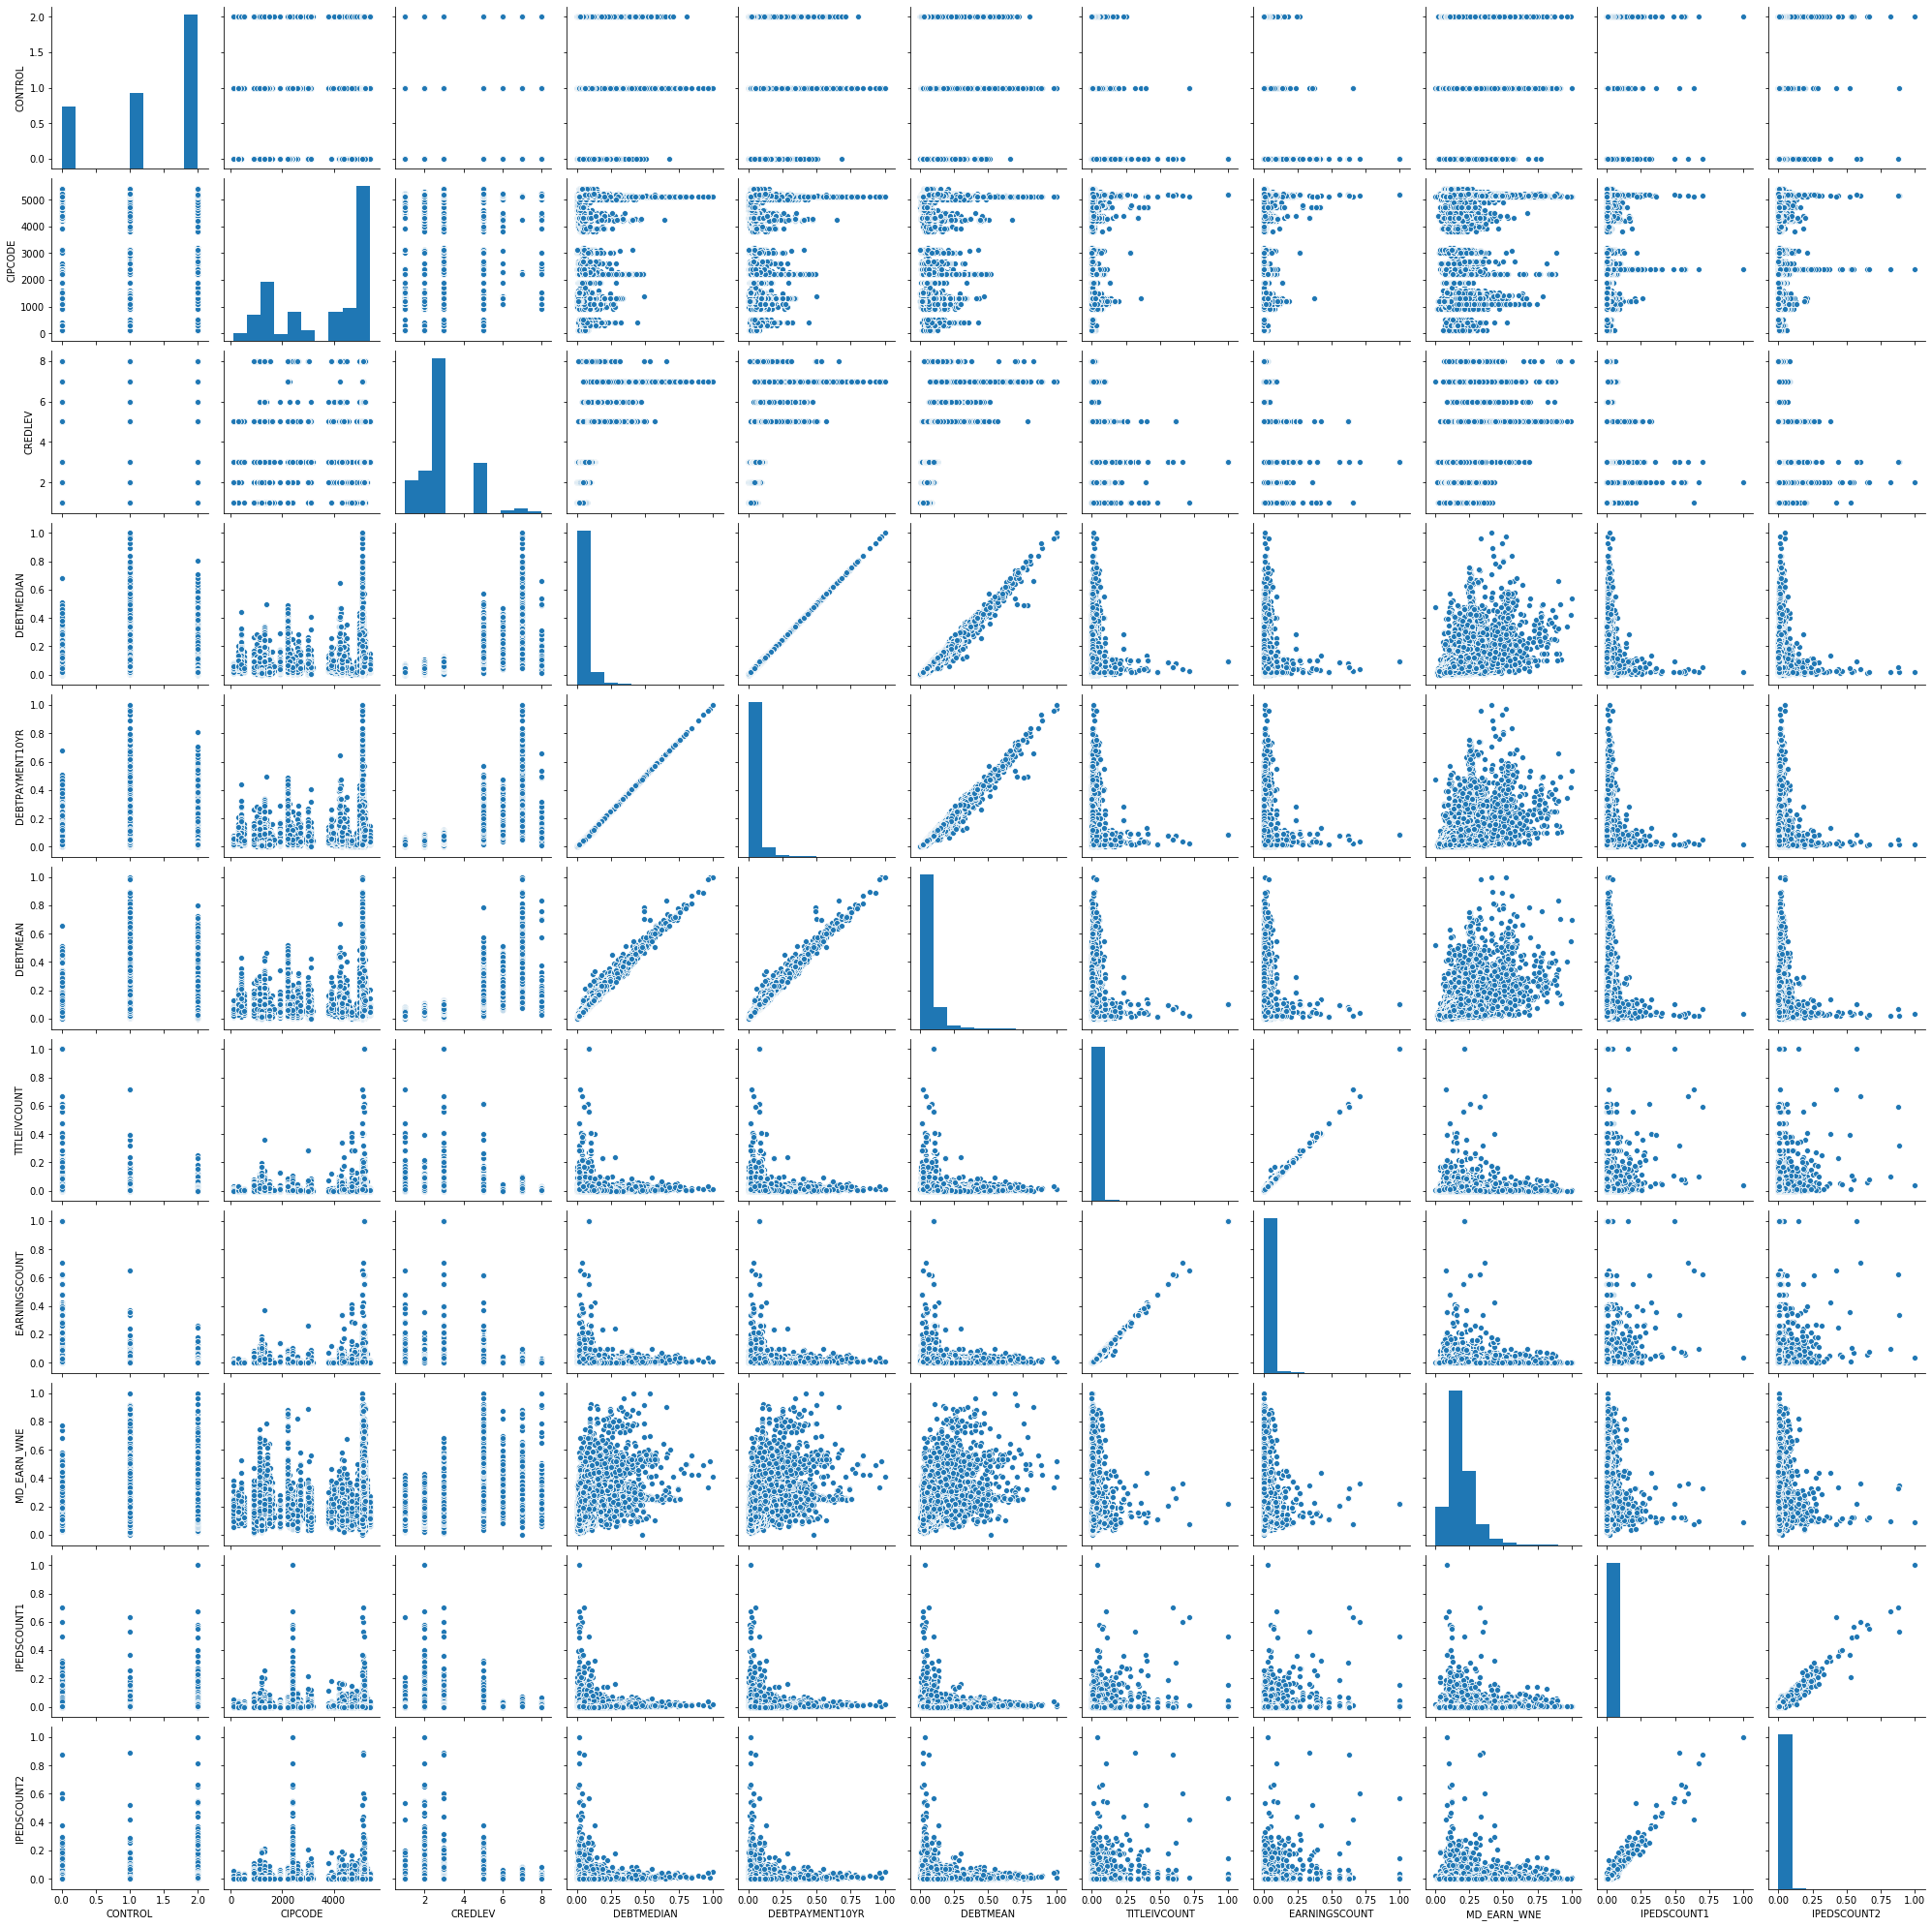

In [42]:
sns.pairplot(X)

We can observe some linear relationships between features.

Since the data are labeled, a supervised learning approach is the most suitable. 

Let's check how a Linear Regression Model could work on predicting the number of loan borrowers who completed college based on these features. Since I am interested to know which factors play significant role on the outcome, I will use Machine and not Deep Learning provided by scikit learn

# modelling


In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()


In [71]:
reg.fit(Xtrain, ytrain)

print('The training score is {}'.format(reg.score(Xtrain, ytrain)))

The training score is 0.9621833506154973


In [72]:
preds = reg.predict(Xtest)

# Evaluation 

As the project is a regression problem the evaluation metrics that will be used is R2 score. The largest the score the better the generalization capabilities of the model are

In [65]:
from sklearn.metrics import r2_score

In [69]:
print('The evaluation R2 is {}'.format(r2_score(ytest, preds)))

The evaluation R2 is 0.963330003820413


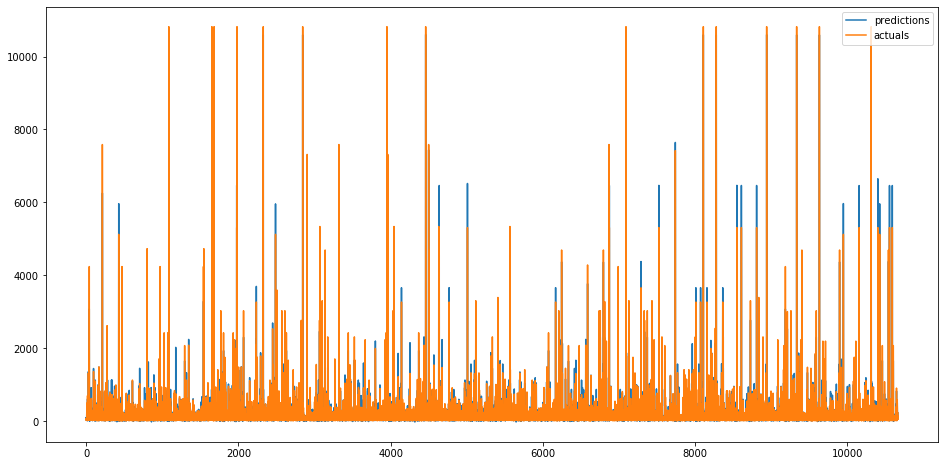

In [70]:
plt.figure(figsize = (16,8))
plt.plot(range(len(preds)), preds)
plt.plot(range(len(ytest)), ytest)
plt.legend(('predictions', 'actuals'), loc = 'upper right')
plt.show()

# Feature selection on a pretrained model

Get the most significant features based on the coefficient importance and retrain

In [74]:
from sklearn.feature_selection import SelectFromModel

In [75]:
model = SelectFromModel(reg, prefit=True)
indices = list(model.get_support(indices=True)) 
len(indices) 

4

In [108]:
# Retrain with the most significan features

In [76]:
XtrainN = Xtrain.iloc[:,indices]
XtestN = Xtest.iloc[:,indices]

In [77]:
reg2 = LinearRegression()
reg2.fit(XtrainN, ytrain)
predictions = reg2.predict(XtestN)

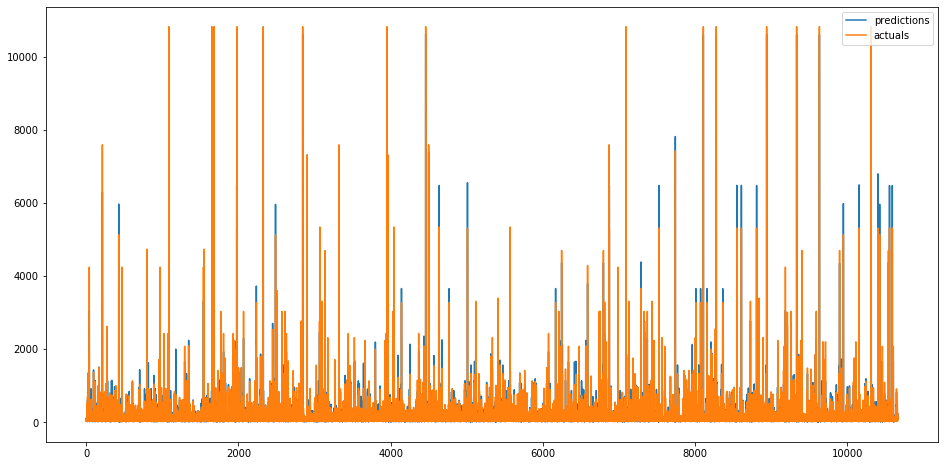

In [78]:
plt.figure(figsize = (16,8))
plt.plot(range(len(predictions)), predictions)
plt.plot(range(len(ytest)), ytest)
plt.legend(('predictions', 'actuals'), loc = 'upper right')
plt.show()

In [79]:
print('The R2 score on the test data after training with {} features is {}%'
      .format(len(indices),r2_score(ytest, predictions)))

The R2 score on the test data after training with 4 features is 0.9625727857132932%


As we see the model performance remained almost the same while training the model with 4 features instead of 11.
Let's explore which are the most significant features

# Look through Pearson's correlation values between features and the Count target variable

In [80]:
count = df.columns.get_loc('COUNT')
indices2 = [count] + indices 

In [81]:
## Create a correlation matrix
df.iloc[:, indices2].corr().sort_values(by='COUNT', ascending = False)

,COUNT,CIPCODE,CREDLEV,DEBTMEDIAN,EARNINGSCOUNT
COUNT,1.000000,0.086662,-0.043430,0.038674,0.978708
EARNINGSCOUNT,0.978708,0.084134,-0.026392,0.046449,1.000000
CIPCODE,0.086662,1.000000,-0.040325,0.070859,0.084134
DEBTMEDIAN,0.038674,0.070859,0.642103,1.000000,0.046449
CREDLEV,-0.043430,-0.040325,1.000000,0.642103,-0.026392


Let's visualize

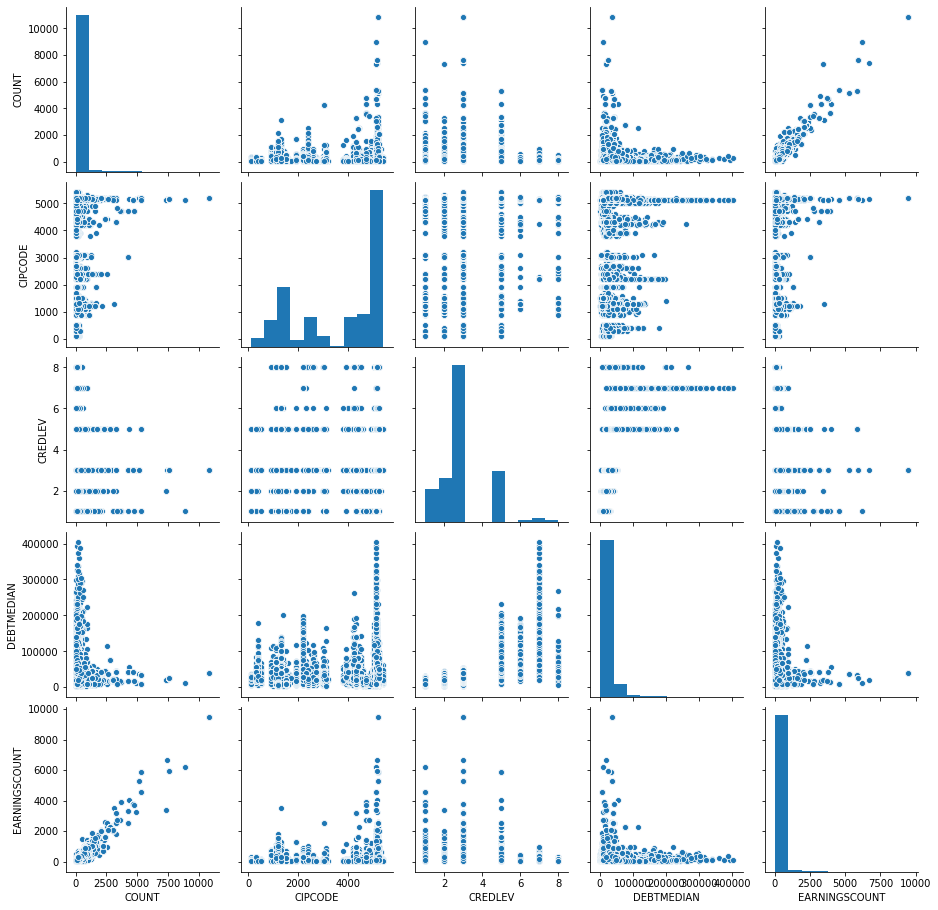

In [114]:
sns.pairplot(df.iloc[:, indices2])

As we can observe the strongest correlation is found between the number of loan borrowers who complete college (COUNT) and the EARNINGSCOUNT (0.97 Pearson's Correlation). As it is observed, the number of federally-aided students completing college in the earnings cohort have a strong positive relationship with the number of loan borrowers who complete college. Consequently, it seems that having earnings than debts is more essential for the final outcome. At the same time, neither the subject of study does not play a significant role (CIPCODE Pearson's coeff: 0.08) nor the level of Education (CREDLEV -0.04) on determining the amount of loan borrowers who do not drop off college.